

---



---


# KNN x Regressão Logística x SVM x **MLP** - Breast cancer

Este notebook mostra o uso de métodos de aprendizado de máquina existentes na biblioteca [scikit-learn](https://scikit-learn.org/stable/index.html) para realizar a classificação do conjunto de dados **Breast cancer** ([Breast Cancer Dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html)).

Os **algoritmos de aprendizagem de máquina** utilizados são:

* [KNeighborsClassifier - KNN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html?highlight=kneighborsclassifier#sklearn.neighbors.KNeighborsClassifier): algoritmo de k-vizinhos mais próximos
* [LogisticRegression - LogReg](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logisticregression#sklearn.linear_model.LogisticRegression): Regressão Logística
*[Support Vector Machines - SVM](https://scikit-learn.org/stable/modules/classes.html?highlight=svm#module-sklearn.svm): Máquina de Vetores de Suporte
*[MLPClassifier - MLP](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html?highlight=mlpclassifier#sklearn.neural_network.MLPClassifier): rede neural de perceptrons multicamadas



## Importa módulo com funções para medir o desempenho do classificador

In [1]:
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix

### Importação dos dados - Breast dataset

In [10]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
class_names = data.target_names
X = data.data
y = data.target

In [13]:
list(data.target_names)

['malignant', 'benign']

## Redução de dimensionalidade usando PCA (*Principal Component Analysis*)

Para melhor entendimento e compreensão da estrutura dos dados aplicamos o algoritmo de redução de dimensionalidade [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA) para visualizarmos os dados em 3 dimensões.

Essa técnica de análise dos componentes principais é comumente usada para
compressão, visualização e classificação de dados. A ideia central é reduzir a dimensionalidade de um conjunto de dados com o mínimo de perda de informação.

As componentes principais em geral são extraídas via matriz de covariância, as quais são influenciadas pelas variáveis de maior variância.


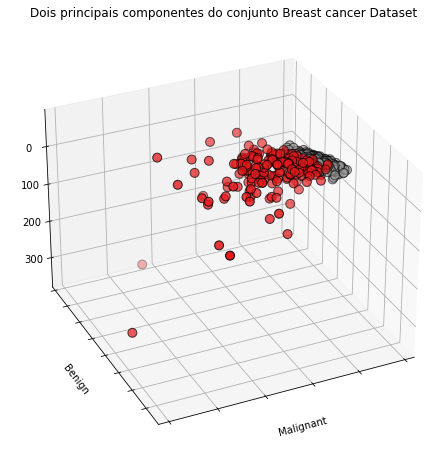

In [29]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA


fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=115)
X_reduced = PCA(n_components=3).fit_transform(data.data) # aplicação da PCA
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=80)
ax.set_title("Dois principais componentes do conjunto Breast cancer Dataset")
ax.set_xlabel("Malignant")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("Benign")
ax.w_yaxis.set_ticklabels([])

plt.show()

### Separar em dois conjuntos de dados (treinamento e teste)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25) 

## Aplicação do KNN

Taxa de acerto =  96.5 %

Matriz de confusão:



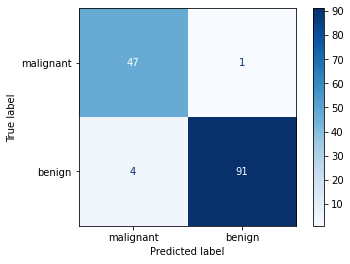

In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=20) 
knn.fit(X_train,y_train)
classificacoes_knn = knn.predict(X_test)
acertos_knn = metrics.accuracy_score(y_test,classificacoes_knn)
print('Taxa de acerto = ',round(acertos_knn*100,2),"%\n")
# matriz de confusão
print('Matriz de confusão:\n')
cm_knn = plot_confusion_matrix(knn, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)
#print(cm_knn.confusion_matrix)

## Aplicação da Regressão Logística

Taxa de acerto =  97.2 %

Matriz de confusão:



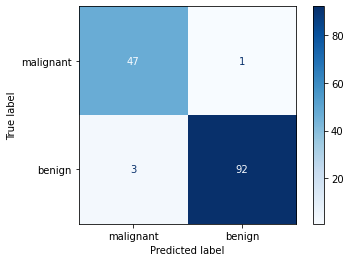

In [22]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver = 'liblinear') # liblinear => conjuntos pequenos
logreg.fit(X_train,y_train)
classificacoes_logreg = logreg.predict(X_test)
acertos_LogReg = metrics.accuracy_score(y_test,classificacoes_logreg)
print('Taxa de acerto = ',round(acertos_LogReg*100,2),"%\n")
# matriz de confusão
print('Matriz de confusão:\n')
cm_logreg = plot_confusion_matrix(logreg, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)
#print(cm_logreg.confusion_matrix)

## Aplicação do SVM

Taxa de acerto =  95.1 %

Matriz de confusão:



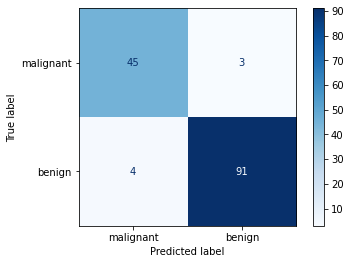

In [23]:
from sklearn import svm
svm = svm.SVC()
svm.fit(X_train, y_train)
classificacoes_svm = svm.predict(X_test)
acertos_svm = metrics.accuracy_score(y_test, classificacoes_svm)
print('Taxa de acerto = ',round(acertos_svm*100,2),"%\n")
# matriz de confusão
print('Matriz de confusão:\n')
cm_svm = plot_confusion_matrix(svm, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)
#print(cm_svm.confusion_matrix)

## Aplicação da rede MLP

Taxa de acerto =  66.43 %

Matriz de confusão:



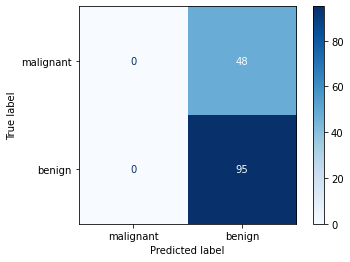

In [24]:
from sklearn.neural_network import MLPClassifier
#import warnings

#warnings.simplefilter("ignore")
mlp = MLPClassifier(hidden_layer_sizes=(30,), solver='lbfgs', max_iter = 500)
mlp.fit(X_train, y_train)
classificacoes_mlp = mlp.predict(X_test)
acertos_mlp = metrics.accuracy_score(y_test, classificacoes_mlp)
print('Taxa de acerto = ',round(acertos_mlp*100,2),"%\n")
# matriz de confusão
print('Matriz de confusão:\n')
cm_mlp = plot_confusion_matrix(mlp, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)
#print(cm_mlp.confusion_matrix)

In [25]:
print(mlp.n_iter_)

6
